In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
df=pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [2]:
df.shape

(19158, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
feature_na=[features for features in df.columns if df[features].isnull().sum()>1]
print(feature_na)
for features in feature_na:
    print(f'Missing values in {features} is {np.round(df[features].isnull().mean(),4)} % ')

['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
Missing values in gender is 0.2353 % 
Missing values in enrolled_university is 0.0201 % 
Missing values in education_level is 0.024 % 
Missing values in major_discipline is 0.1468 % 
Missing values in experience is 0.0034 % 
Missing values in company_size is 0.3099 % 
Missing values in company_type is 0.3205 % 
Missing values in last_new_job is 0.0221 % 


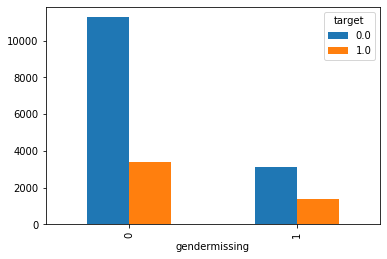

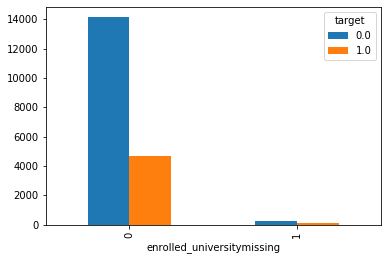

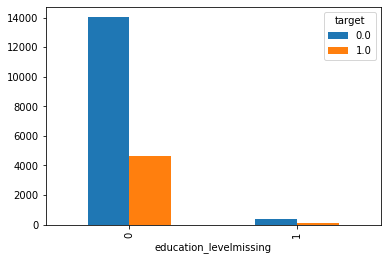

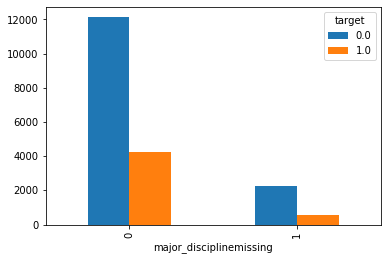

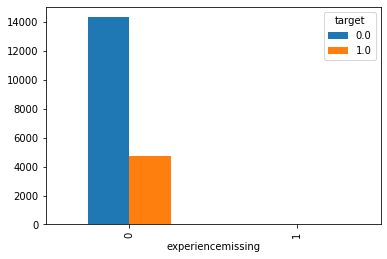

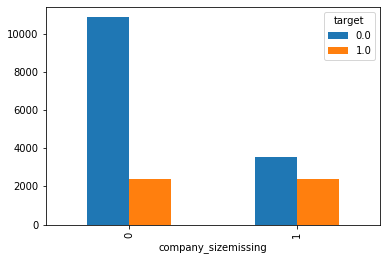

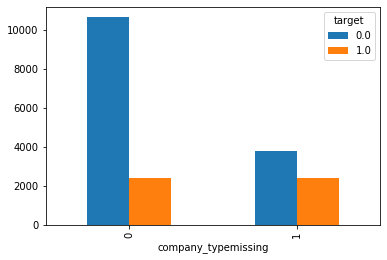

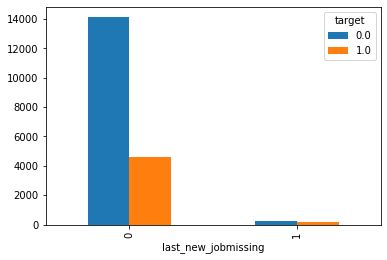

In [5]:
for features in feature_na:
    data=df.copy()
    data[features+'missing']=np.where(data[features].isnull(),1,0)
    relations=pd.crosstab(data[features+'missing'],columns=data['target'])
    relations.plot.bar()
    plt.show()

In [6]:
df['gender']=df['gender'].fillna('Missing')
df['gender'].value_counts()

Male       13221
Missing     4508
Female      1238
Other        191
Name: gender, dtype: int64

In [7]:
df['education_level']=df['education_level'].fillna('Missing')
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Missing             460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [8]:
df['major_discipline']=df['major_discipline'].fillna('Other')
df['major_discipline'].value_counts()

STEM               14492
Other               3194
Humanities           669
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [9]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [10]:
df['experience']=df['experience'].str.replace('[>,<]','')
df['experience'].unique()

array(['20', '15', '5', '1', '11', '13', '7', '17', '2', '16', '4', '10',
       '14', '18', '19', '12', '3', '6', '9', '8', nan], dtype=object)

In [11]:
df['experience']=pd.to_numeric(df['experience'])
mean_exp=np.mean(df['experience'])
print(mean_exp)

9.955376315927303


In [12]:
df['Missing_experience']=np.where(df['experience'].isnull(),1,0)
df['experience']=df['experience'].fillna(10)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,1.0,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0,0
2,11561,city_21,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,0.0,0
3,33241,city_115,0.789,Missing,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,never,52,1.0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,0.0,0


In [13]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [14]:
mapper={'50-99':3,
       '<10':1,
       '10000+':8,
       '5000-9999':7,
       '1000-4999':6,
       '10/49':2,
       '100-500':4,
       '500-999':5}
df['company_size']=df['company_size'].map(mapper)
df['company_size'].unique()

array([nan,  3.,  1.,  8.,  7.,  6.,  2.,  4.,  5.])

In [15]:
df['company_size']=pd.to_numeric(df['company_size'])
mean=np.mean(df['company_size'])
print(mean)
df['companysize_missing']=np.where(df['company_size'].isnull(),1,0)
df['company_size']=df['company_size'].fillna(4)
df.head()

4.253328290468986


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience,companysize_missing
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,4.0,NaN,1,36,1.0,0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,3.0,Pvt Ltd,>4,47,0.0,0,0
2,11561,city_21,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5.0,4.0,NaN,never,83,0.0,0,1
3,33241,city_115,0.789,Missing,No relevent experience,NaN,Graduate,Business Degree,1.0,4.0,Pvt Ltd,never,52,1.0,0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,3.0,Funded Startup,4,8,0.0,0,0


In [16]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [17]:
df['company_type']=df['company_type'].fillna('Other')
df['company_type'].unique()

array(['Other', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'NGO'], dtype=object)

In [18]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [19]:
mapper1={'1':1,
        '2':2,
        '3':3,
        '4':4,
         '>4':5,
        'never':0}
df['last_new_job']=df['last_new_job'].map(mapper1)
df['last_new_job'].unique()

array([ 1.,  5.,  0.,  4.,  3.,  2., nan])

In [20]:
df['last_new_job']=pd.to_numeric(df['last_new_job'])
df['job_missing']=np.where(df['last_new_job'].isnull(),1,0)
df['last_new_job']=df['last_new_job'].fillna(3)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience,companysize_missing,job_missing
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,4.0,Other,1.0,36,1.0,0,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,3.0,Pvt Ltd,5.0,47,0.0,0,0,0
2,11561,city_21,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5.0,4.0,Other,0.0,83,0.0,0,1,0
3,33241,city_115,0.789,Missing,No relevent experience,NaN,Graduate,Business Degree,1.0,4.0,Pvt Ltd,0.0,52,1.0,0,1,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,3.0,Funded Startup,4.0,8,0.0,0,0,0


In [21]:
df=df.dropna()

In [22]:
df['target'].value_counts()

0.0    14118
1.0     4654
Name: target, dtype: int64

In [23]:
feature_na=[features for features in df.columns if df[features].isnull().sum()>1]
print(feature_na)
for features in feature_na:
    print(f'Missing values in {features} is {np.round(df[features].isnull().mean(),4)} % ')

[]


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18772 entries, 0 to 19157
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18772 non-null  int64  
 1   city                    18772 non-null  object 
 2   city_development_index  18772 non-null  float64
 3   gender                  18772 non-null  object 
 4   relevent_experience     18772 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18772 non-null  object 
 7   major_discipline        18772 non-null  object 
 8   experience              18772 non-null  float64
 9   company_size            18772 non-null  float64
 10  company_type            18772 non-null  object 
 11  last_new_job            18772 non-null  float64
 12  training_hours          18772 non-null  int64  
 13  target                  18772 non-null  float64
 14  Missing_experience      18772 non-null

In [25]:
dict1=np.round(df.groupby(df['city'])['city_development_index'].mean(),4).to_dict()
print(dict1)

{'city_1': 0.847, 'city_10': 0.895, 'city_100': 0.887, 'city_101': 0.558, 'city_102': 0.804, 'city_103': 0.92, 'city_104': 0.924, 'city_105': 0.794, 'city_106': 0.698, 'city_107': 0.518, 'city_109': 0.701, 'city_11': 0.55, 'city_111': 0.698, 'city_114': 0.926, 'city_115': 0.789, 'city_116': 0.743, 'city_117': 0.698, 'city_118': 0.722, 'city_12': 0.64, 'city_120': 0.78, 'city_121': 0.781, 'city_123': 0.738, 'city_126': 0.479, 'city_127': 0.745, 'city_128': 0.527, 'city_129': 0.625, 'city_13': 0.827, 'city_131': 0.68, 'city_133': 0.742, 'city_134': 0.698, 'city_136': 0.897, 'city_138': 0.836, 'city_139': 0.487, 'city_14': 0.698, 'city_140': 0.856, 'city_141': 0.763, 'city_142': 0.727, 'city_143': 0.74, 'city_144': 0.84, 'city_145': 0.555, 'city_146': 0.735, 'city_149': 0.689, 'city_150': 0.698, 'city_152': 0.698, 'city_155': 0.556, 'city_157': 0.769, 'city_158': 0.766, 'city_159': 0.843, 'city_16': 0.91, 'city_160': 0.92, 'city_162': 0.767, 'city_165': 0.903, 'city_166': 0.649, 'city_167

## From above Dictionary it is clear that every each city name in row has same development index adn hence we can drop city value and use city_developement_index

In [26]:
df=df.drop(['city','enrollee_id'],axis=1)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience,companysize_missing,job_missing
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,4.0,Other,1.0,36,1.0,0,1,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,3.0,Pvt Ltd,5.0,47,0.0,0,0,0
2,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5.0,4.0,Other,0.0,83,0.0,0,1,0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,3.0,Funded Startup,4.0,8,0.0,0,0,0
5,0.764,Missing,Has relevent experience,Part time course,Graduate,STEM,11.0,4.0,Other,1.0,24,1.0,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18772 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18772 non-null  float64
 1   gender                  18772 non-null  object 
 2   relevent_experience     18772 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18772 non-null  object 
 5   major_discipline        18772 non-null  object 
 6   experience              18772 non-null  float64
 7   company_size            18772 non-null  float64
 8   company_type            18772 non-null  object 
 9   last_new_job            18772 non-null  float64
 10  training_hours          18772 non-null  int64  
 11  target                  18772 non-null  float64
 12  Missing_experience      18772 non-null  int32  
 13  companysize_missing     18772 non-null  int32  
 14  job_missing             18772 non-null

In [28]:
categorical_var=[features for features in df.columns if df[features].dtype == 'O']
print(categorical_var)

['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type']


In [29]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience,companysize_missing,job_missing
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,4.0,Other,1.0,36,1.0,0,1,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,3.0,Pvt Ltd,5.0,47,0.0,0,0,0
2,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5.0,4.0,Other,0.0,83,0.0,0,1,0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,3.0,Funded Startup,4.0,8,0.0,0,0,0
5,0.764,Missing,Has relevent experience,Part time course,Graduate,STEM,11.0,4.0,Other,1.0,24,1.0,0,1,0


In [30]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [31]:
mapper2={'Has relevent experience':1,
    'No relevent experience':0}
df['relevent_experience']=df['relevent_experience'].map(mapper2)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience,companysize_missing,job_missing
0,0.920,Male,1,no_enrollment,Graduate,STEM,20.0,4.0,Other,1.0,36,1.0,0,1,0
1,0.776,Male,0,no_enrollment,Graduate,STEM,15.0,3.0,Pvt Ltd,5.0,47,0.0,0,0,0
2,0.624,Missing,0,Full time course,Graduate,STEM,5.0,4.0,Other,0.0,83,0.0,0,1,0
4,0.767,Male,1,no_enrollment,Masters,STEM,20.0,3.0,Funded Startup,4.0,8,0.0,0,0,0
5,0.764,Missing,1,Part time course,Graduate,STEM,11.0,4.0,Other,1.0,24,1.0,0,1,0


In [32]:
mapper3={'Missing':0,
        'Primary School':1,
        'High School':2,
        'Graduate':3,
        'Masters':4,
        'Phd':5}

df['education_level']=df['education_level'].map(mapper3)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience,companysize_missing,job_missing
0,0.920,Male,1,no_enrollment,3,STEM,20.0,4.0,Other,1.0,36,1.0,0,1,0
1,0.776,Male,0,no_enrollment,3,STEM,15.0,3.0,Pvt Ltd,5.0,47,0.0,0,0,0
2,0.624,Missing,0,Full time course,3,STEM,5.0,4.0,Other,0.0,83,0.0,0,1,0
4,0.767,Male,1,no_enrollment,4,STEM,20.0,3.0,Funded Startup,4.0,8,0.0,0,0,0
5,0.764,Missing,1,Part time course,3,STEM,11.0,4.0,Other,1.0,24,1.0,0,1,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18772 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18772 non-null  float64
 1   gender                  18772 non-null  object 
 2   relevent_experience     18772 non-null  int64  
 3   enrolled_university     18772 non-null  object 
 4   education_level         18772 non-null  int64  
 5   major_discipline        18772 non-null  object 
 6   experience              18772 non-null  float64
 7   company_size            18772 non-null  float64
 8   company_type            18772 non-null  object 
 9   last_new_job            18772 non-null  float64
 10  training_hours          18772 non-null  int64  
 11  target                  18772 non-null  float64
 12  Missing_experience      18772 non-null  int32  
 13  companysize_missing     18772 non-null  int32  
 14  job_missing             18772 non-null

In [34]:
df.shape

(18772, 15)

In [35]:
categorical_var=[features for features in df.columns if df[features].dtype == 'O']
print(categorical_var)

['gender', 'enrolled_university', 'major_discipline', 'company_type']


In [36]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [37]:
mapper4={'no_enrollment':0,
         'Part time course':1,
        'Full time course':2}
df['enrolled_university']=df['enrolled_university'].map(mapper4)
df['enrolled_university'].unique()

array([0, 2, 1], dtype=int64)

In [38]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Missing_experience,companysize_missing,job_missing
0,0.920,Male,1,0,3,STEM,20.0,4.0,Other,1.0,36,1.0,0,1,0
1,0.776,Male,0,0,3,STEM,15.0,3.0,Pvt Ltd,5.0,47,0.0,0,0,0
2,0.624,Missing,0,2,3,STEM,5.0,4.0,Other,0.0,83,0.0,0,1,0
4,0.767,Male,1,0,4,STEM,20.0,3.0,Funded Startup,4.0,8,0.0,0,0,0
5,0.764,Missing,1,1,3,STEM,11.0,4.0,Other,1.0,24,1.0,0,1,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18772 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18772 non-null  float64
 1   gender                  18772 non-null  object 
 2   relevent_experience     18772 non-null  int64  
 3   enrolled_university     18772 non-null  int64  
 4   education_level         18772 non-null  int64  
 5   major_discipline        18772 non-null  object 
 6   experience              18772 non-null  float64
 7   company_size            18772 non-null  float64
 8   company_type            18772 non-null  object 
 9   last_new_job            18772 non-null  float64
 10  training_hours          18772 non-null  int64  
 11  target                  18772 non-null  float64
 12  Missing_experience      18772 non-null  int32  
 13  companysize_missing     18772 non-null  int32  
 14  job_missing             18772 non-null

In [40]:
df.shape

(18772, 15)

In [41]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Missing_experience,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,1,0,3,20.0,4.0,1.0,36,1.0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.776,0,0,3,15.0,3.0,5.0,47,0.0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.624,0,2,3,5.0,4.0,0.0,83,0.0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.767,1,0,4,20.0,3.0,4.0,8,0.0,0,...,0,0,0,0,1,1,0,0,0,0
5,0.764,1,1,3,11.0,4.0,1.0,24,1.0,0,...,0,0,0,0,1,0,0,1,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18772 entries, 0 to 19157
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            18772 non-null  float64
 1   relevent_experience               18772 non-null  int64  
 2   enrolled_university               18772 non-null  int64  
 3   education_level                   18772 non-null  int64  
 4   experience                        18772 non-null  float64
 5   company_size                      18772 non-null  float64
 6   last_new_job                      18772 non-null  float64
 7   training_hours                    18772 non-null  int64  
 8   target                            18772 non-null  float64
 9   Missing_experience                18772 non-null  int32  
 10  companysize_missing               18772 non-null  int32  
 11  job_missing                       18772 non-null  int32  
 12  gend

In [43]:
X=df.drop(['target'],axis=1)
X.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Missing_experience,companysize_missing,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,1,0,3,20.0,4.0,1.0,36,0,1,...,0,0,0,0,1,0,0,1,0,0
1,0.776,0,0,3,15.0,3.0,5.0,47,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.624,0,2,3,5.0,4.0,0.0,83,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0.767,1,0,4,20.0,3.0,4.0,8,0,0,...,0,0,0,0,1,1,0,0,0,0
5,0.764,1,1,3,11.0,4.0,1.0,24,0,1,...,0,0,0,0,1,0,0,1,0,0


In [44]:
Y=df['target'].copy()
Y.head()

0    1.0
1    0.0
2    0.0
4    0.0
5    1.0
Name: target, dtype: float64

In [45]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [46]:
Y.value_counts()

0.0    14118
1.0    14118
Name: target, dtype: int64

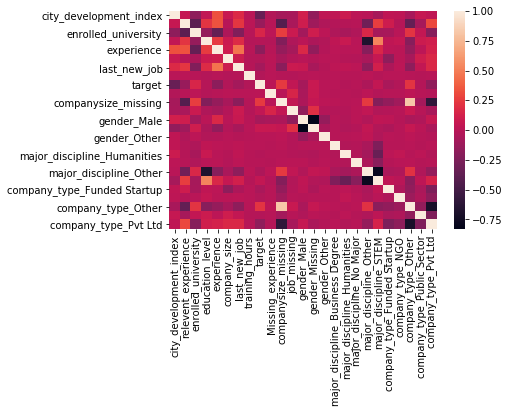

In [47]:
sns.heatmap(df.corr())

In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Missing_experience,companysize_missing,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.893553,0.733936,-0.605842,-0.018858,1.672205,-0.091873,-0.583848,-0.482663,-0.046146,1.379546,...,-0.108411,-0.156378,-0.088615,-0.377077,0.576914,-0.194673,-0.136301,1.357441,-0.19002,-0.859459
1,-0.230710,-1.362516,-0.605842,-0.018858,0.887810,-0.675427,1.909333,-0.296570,-0.046146,-0.724876,...,-0.108411,-0.156378,-0.088615,-0.377077,0.576914,-0.194673,-0.136301,-0.736680,-0.19002,1.163522
2,-1.417432,-1.362516,1.853764,-0.018858,-0.680979,-0.091873,-1.207143,0.312460,-0.046146,1.379546,...,-0.108411,-0.156378,-0.088615,-0.377077,0.576914,-0.194673,-0.136301,1.357441,-0.19002,-0.859459
3,-0.300977,0.733936,-0.605842,1.319047,1.672205,-0.675427,1.286038,-0.956353,-0.046146,-0.724876,...,-0.108411,-0.156378,-0.088615,-0.377077,0.576914,5.136828,-0.136301,-0.736680,-0.19002,-0.859459
4,-0.324399,0.733936,0.623961,-0.018858,0.260295,-0.091873,-0.583848,-0.685673,-0.046146,1.379546,...,-0.108411,-0.156378,-0.088615,-0.377077,0.576914,-0.194673,-0.136301,1.357441,-0.19002,-0.859459


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(f'{len(X_train)} {len(Y_train)}')
print(f'{len(X_test)} {len(Y_test)}')

19765 19765
8471 8471


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
clf=GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 200)
# clf=SVC()
clf.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=200)

In [51]:
# clf.feature_importances_ 

In [52]:
Y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,f1_score,plot_roc_curve
score=clf.score(X_test,Y_test)
print(score)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
fscore=f1_score(Y_test,Y_pred)
print(fscore)

0.8413410459213788
[[3566  694]
 [ 650 3561]]
0.8412473423104182


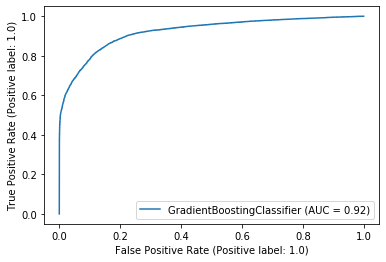

In [53]:
plot_roc_curve(clf,X,Y)

In [54]:
# from sklearn.model_selection import StratifiedKFold,cross_val_score
# cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
# scoring = cross_val_score(clf,X,Y,cv=cv,scoring='f1')
# print(min(scoring))
# print(max(scoring))
# print(np.mean(scoring))

In [55]:
# from sklearn.model_selection import GridSearchCV
# params={'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#        'n_estimators':[200,300,400,500]}
# grid_search=GridSearchCV(clf,param_grid=params,cv=10,scoring='f1')
# grid_search = grid_search.fit(X_train,Y_train)
# accuracy = grid_search.best_score_
# print(accuracy)

In [56]:
# grid_search.best_params_